In [1]:
# 加这行不需要再写plt.show()，就可以直接显示图像出来
%matplotlib inline 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
display_columns = ["title","read_num","like_num","comment_num","reward_num","p_date"]

In [2]:
# 从csv文件中加载
df = pd.read_csv(".\\data_set\\wxpost.csv")
# 重新设置列的顺序
df = df.reindex(columns=display_columns)
# 将p_date的数据类型从timestamp 转换成 datetime
df.p_date = pd.to_datetime(df['p_date'])
df.head()

,title,read_num,like_num,comment_num,reward_num,p_date
0,为什么我推荐你学习数据分析,3549,22,0,0,2018-01-15 19:59:14+00:00
1,推荐几个公众号（文末彩蛋）,4866,37,0,0,2018-01-12 12:13:55+00:00
2,普通程序员的逆袭：如何学习数据挖掘与人工智能,3582,14,0,0,2018-01-11 21:06:24+00:00
3,这10个题，有 68% 的人答不对,3643,49,0,1,2018-01-10 07:31:18+00:00
4,Python知识冲顶大会,5308,30,0,0,2018-01-08 08:00:00+00:00


In [3]:
df.describe()

,read_num,like_num,comment_num,reward_num
count,203.000000,203.000000,203.0,203.000000
mean,2404.694581,31.891626,0.0,2.551724
std,2005.320602,31.026467,0.0,7.322895
min,124.000000,0.000000,0.0,0.000000
25%,1032.500000,8.500000,0.0,0.000000
50%,1844.000000,25.000000,0.0,0.000000
75%,3498.000000,43.500000,0.0,3.000000
max,8628.000000,190.000000,0.0,83.000000


In [4]:
df.read_num.sum()

488153

D:\Programing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Programing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36719 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Programing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32771 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Programing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34385 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Programing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23558 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Programing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20316 missing from current

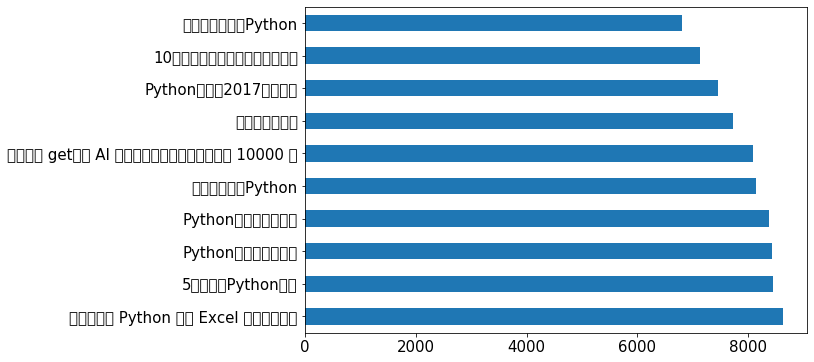

In [9]:
# 根据阅读数排序，ascending 表示降序排列
top_read_num_10 = df.sort_values(by=['read_num'], ascending=False)[:10]
top_read_num_10 = top_read_num_10[display_columns]
# 重置行索引，drop 表示删除原来的行索引
top_read_num_10.reset_index(drop=True)
ax = top_read_num_10.plot(x='title', y='read_num', kind='barh', figsize=(9,6), fontsize=15) 
ax.set_ylabel("")
ax.set_xlabel("")
ax.legend().set_visible(False)